In [1]:
import numpy as np

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset creation

Let's create a sample of examples with one variable $x$, in two categories. 
For category 1, the underlying probability distribution is a Gaussian centered on -1.5 with unit standard deviation. For category 2, the Gaussian is centered on 1.5 . 

In [3]:
normal = np.random.normal
sigma = 1
x1 = normal(-1.5, sigma, 100)
x2 = normal(1.5, sigma, 100)
y1 = np.zeros_like(x1)
y2 = np.ones_like(x2)

These two samples can be visualized as a scatter plot, with the category on the y axis:

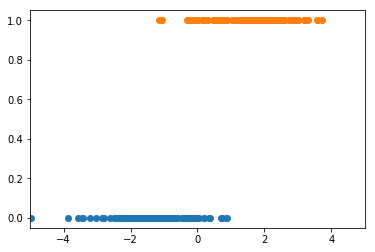

In [4]:
plt.xlim(-5,5)
plt.plot(x1, y1,'o')
plt.plot(x2, y2,'o')

And we can also show histograms. For each category, the histogram has 50 bins, that count the number of examples with a value falling in the bin:

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2., 0., 0., 0., 3., 3., 2., 3., 6., 8., 4., 4., 7., 5., 7.,
        9., 8., 6., 6., 2., 9., 1., 2., 1., 2., 0., 0., 0., 0., 0., 0.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 50 Patch objects>)

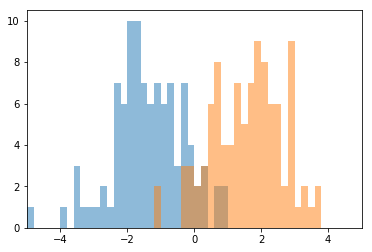

In [5]:
# plt.hist(sample1,bins=50, range=(-5,5))
plt.clf()
plt.xlim(-5,5)
plt.hist(x1,bins=50, range=(-5,5), alpha=0.5)
plt.hist(x2,bins=50, range=(-5,5), alpha=0.5)

By eye, we see that examples from the two samples can be classified by setting a separation boundary at $x=0$. Given an unknown sample, if $x>0$ we classify it to category 1, and to category 0 otherwise.

We are now going to see how the most simple neural network can find the boundary for us. 

But first, we must talk about the sigmoid function. 

## The sigmoid function 

The sigmoid or logistic function is essential in classification problems. In 1D, the sigmoid function is expressed as

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

and here is what it looks like, together with our samples. 

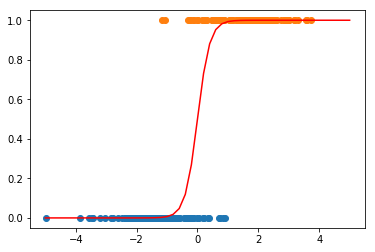

In [6]:
# define parameters
b = 0
w = 5

def sigmoid(x1):
    # z is a linear function of x1
    z = w*x1 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
linx = np.linspace(-5,5,51)
plt.plot(x1, np.zeros_like(x1),'o')
plt.plot(x2, np.ones_like(x2),'o')
plt.plot(linx, sigmoid(linx), color='red')

Let's understand this function in more details:

* when x goes to infinity, $e^{-x}$ goes to zero, and $\sigma (x)$ goes to one.
* when x goes to minus infinity, $e^{-x}$ goes to infinity, and $\sigma (x)$ goes to zero.
* $\sigma(0) = 0.5$

It is important to note that the sigmoid is bound between 0 and 1, like a probability. And actually, in classification problems, the probability for an example to belong to a given category is produced by a sigmoid function.

Now go back to the cell above, and play a bit with the `b` and `w` parameters, redoing the plot everytime you change one of these parameters. 

* $b$ is the **bias**. Changing the bias simply moves the sigmoid along the horizontal axis. For example, if you choose $b=1$ and $w=0$, then $z = x + b$ takes a zero value at $x=-1$, and that's where the sigmoid will be equal to 0.5
* $w$ is the **weight** of variable $x$. If you increase it, the sigmoid evolves faster as a function of $x$ and gets sharper.

To classify our examples, we could simply use the output of the sigmoid: A given unknown example with value $x$ will be classified to category 1 if $\sigma(z) > 0.5$, and to category 0 otherwise. 

For this classification to work well, we see that the bias $b$ has to be set to 0, and that the weight $w$ does not have any importance (which is not the case in general). 

## The most simple neural network ever

In this section we will build the most simple neural network to classify our examples:

* Each example has one variable, so we need 1 input neuron on the input layer
* We're not going to use any hidden layer, as that would make the network more complicated
* We have two categories, so the output of the network should be a single value between 0 and 1, the probability $p$ for the example to belong to category 1. Then, the probability to belong to category 0 is simply $1-p$. Therefore, we should have a single output neuron, the only actual neuron in the network.

It seems that the sigmoid function somehow has to be used in the output neuron. Indeed, it spits out a value between 0 and 1, and can be used as a classification probability as we have seen in the previous section.

We can represent our network in the following way:

![Neural network with 1 neuron](https://github.com/cbernet/maldives/raw/master/images/one_neuron.png)

In the output neuron: 

* the first box changes variable and computes the *weighted input* $z$ of the neuron
* the second box applies the *activation function*. Here, we choose the sigmoid $\sigma (z) = 1/(1+e^{-z})$ as an activation function

This simple network has only 2 tunable parameters, the weight $w$ and the bias $b$. We see in particular that when the bias is very large, the neuron will always be activated, whatever the input. On the contrary, for very negative biases, the neuron is dead. 

Neural networks with no hidden layer, and a sigmoid activation function on the neurons of the output layers are in fact used very often in machine learning problems. 

This type of algorithm is called a **logistic regression**.

In the next sections, we will use the logistic regression from scikit-learn to classify our examples, and then we'll repeat the exercise with the one-neuron neural network.

But first, we need to build a single sample containing the examples of the two categories:

In [7]:
# x is a 1D array that contains x1 and x2:
x = np.concatenate((x1, x2))
# now x is a 2D array with 1 value per line, that's what we need:
x = np.c_[x]
# y contains target 1 and target2. It should be 1D.
y = np.concatenate((y1, y2))

## Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression

Let's train (we could also say fit) the logistic regression to the data

In [9]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(x,y)

Now, we can predict the probability for an example to be in a given category. For $x=4$, we're very far into category 1, and the probability to belong to this category is over 99.9%:

In [10]:
clf.predict_proba([[4]])

array([[1.06543810e-04, 9.99893456e-01]])

Now let's plot the predicted probability as a function of x, together with our samples. First, we need to create an array with 100 evenly spaced values of $x$, and convert this array to a 2D array with a single value of x on each line:

In [11]:
linx = np.c_[np.linspace(-5, 5, 100)]

The probabilities for all values of $x$ are

In [12]:
prob = clf.predict_proba(linx)
# take the second probability 
# (to be in category 1) for each example
# and reshape it to a 1D array of size 100
prob = prob[:,1].reshape(len(linx))

And plot the probability vs x:

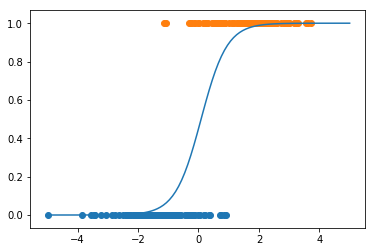

In [13]:
plt.plot(linx, prob)
plt.scatter(x1, y1)
plt.scatter(x2, y2)

It seems that the logistic regression was optimized correctly. 

## One-neuron neural network

We're now going to redo the same exercise with the neural network classifier of scikit-learn. We use:

* no hidden layer
* a sigmoid (also called logistic) activation

scikit-learn will find out that we have a single input variable per example, and that we want to do binary classification (to classify in two categories). Therefore, it will create the neural network automatically with one neuron in the input layer and one neuron in the output layer. 

In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(), 
                    alpha = 0.001,
                    activation='logistic', 
                    solver='lbfgs', random_state=1)

mlp.fit(x,y)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

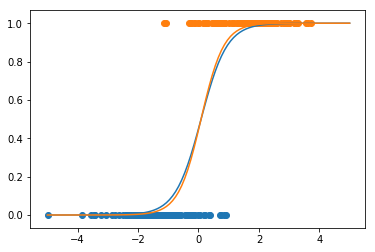

In [15]:
prob_mlp = mlp.predict_proba(linx)
# take the second probability 
# (to be in category 1) for each example
# and reshape it to a 1D array of size 100
prob_mlp = prob_mlp[:,1].reshape(len(linx))
plt.plot(linx, prob)
plt.plot(linx, prob_mlp)
plt.scatter(x1, y1)
plt.scatter(x2, y2)

As expected, the results are very similar. The differences are certainly due to some of the operations performed under the hood by the MLPClassifier. 

Honestly I don't know what's going on in there and I don't want to dig inside.
Indeed, the [MLPClassifier interface](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) is too opaque to my taste, and we will use [keras](https://thedatafrog.com/neural-network-keras/) to work with neural networks anyway. 